# Have the World Become Less Peaceful? An Emirical Analysis of Geopolitical Trends

Imports and set magics:

In [1]:
# %pip install matplotlib-venn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


## Caldara & Iacoviello (2022) Geopolitical Risk Index (GPR)

To start this project, we import a raw file containting the Geopolitical Risk Index (GPR) created by Caldara & Iacoviello (2022). This index measures general uncertainty about things such as war, terrorism and other international conflicts. 

In [2]:
filename = 'GPR_quarter.xlsx'
gpr_raw = pd.read_excel(filename, index_col=0, parse_dates=True)

In [3]:
cleaner = dataproject.gpr_clean(gpr_raw) # Create an instance of the gpr_clean class
df_gpr = cleaner() # Returns the cleaned DataFrame

In [4]:
# Inspect the first 5 rows of the cleaned DataFrame
df_gpr.head(5)

,Date,Country_name,GPRH
0,1900-01-01,Argentina,-0.416765
1,1900-04-01,Argentina,-0.577234
2,1900-07-01,Argentina,-0.331201
3,1900-10-01,Argentina,-0.414413
4,1901-01-01,Argentina,-0.532810


## Direction of Trade Statistics (DOTS) from IMF

In [5]:
filename_imf = 'dots_imf.xlsx'
dots_raw = pd.read_excel(filename_imf)

dots_cleaner = dataproject.dots_clean(dots_raw) # Creates an instance of the dots_clean class
df_dots = dots_cleaner() # Returns the cleaned DataFrame

In [6]:
df_dots.head(5)

Counterpart_name  trade_share
Date       Country_name                              
1960-01-01 Argentina       United States     0.200482
           Argentina      United Kingdom     0.172904
           Argentina             Belgium     0.026921
           Argentina             Denmark     0.003064
           Argentina              France     0.048588

Now we use the DOTS DataFrame to calculate trade weighted GPR indices.

In [17]:
trade_cleaner = dataproject.merge_dots_gpr(df_dots, df_gpr)
df_trade = trade_cleaner()

In [18]:
df_trade.head(5)

,Date,Country_name,GPRH_trade_weight
0,1960-01-01,Argentina,-0.097294
1,1960-04-01,Argentina,0.461158
2,1960-07-01,Argentina,0.489343
3,1960-10-01,Argentina,0.142600
4,1961-01-01,Argentina,-0.449667


## Ideal Point Calculations

In [10]:
filename_idealpoint = 'IdealpointestimatesAll_Sep2023.csv'
idealpoint_raw = pd.read_csv(filename_idealpoint, delimiter=';')

cleaner = dataproject.idealpoint_clean(idealpoint_raw)
df_idealpoint = cleaner()

This can be merged with GPR data.

In [25]:
merger = dataproject.merge_data(df_gpr, df_idealpoint)
df_gpr_idealpoint = merger()

In [34]:
df_gpr_idealpoint.head(5)

,,GPRH,IdealPointAll,NewColumn
Date,Country_name,,,
1946-01-01,Argentina,0.429051,1.860128,1
1946-04-01,Argentina,0.514888,1.860128,1
1946-07-01,Argentina,0.505425,1.860128,1
1946-10-01,Argentina,0.539356,1.860128,1
1947-01-01,Argentina,0.272223,2.214596,1
1947-04-01,Argentina,0.157388,2.214596,1
1947-07-01,Argentina,1.359836,2.214596,1
1947-10-01,Argentina,0.060924,2.214596,1
1948-01-01,Argentina,-0.065262,0.676745,1


In [23]:
df_final = df_trade.reset_index().merge(df_gpr_idealpoint.reset_index(), on=['Country_name', 'Date'], how='left')
df_final.drop(columns='index', inplace=True)
df_final.set_index(['Date', 'Country_name'], inplace=True)

In [33]:
df_final.head(10)

,,GPRH_trade_weight,GPRH,IdealPointAll
Date,Country_name,,,
1960-01-01,Argentina,-0.097294,0.193814,0.930092
1960-04-01,Argentina,0.461158,0.568831,0.930092
1960-07-01,Argentina,0.489343,0.491626,0.930092
1960-10-01,Argentina,0.142600,0.276994,0.930092
1961-01-01,Argentina,-0.449667,-0.266736,0.974067
1961-04-01,Argentina,0.163223,0.056049,0.974067
1961-10-01,Argentina,0.420234,0.038446,0.974067
1962-01-01,Argentina,1.813731,1.468162,0.850363
1962-04-01,Argentina,0.235421,0.211516,0.850363


In [30]:
nans = df_final.isna().sum()
print(nans)

GPRH_trade_weight       0
GPRH                 1165
IdealPointAll        1165
dtype: int64


# Plots

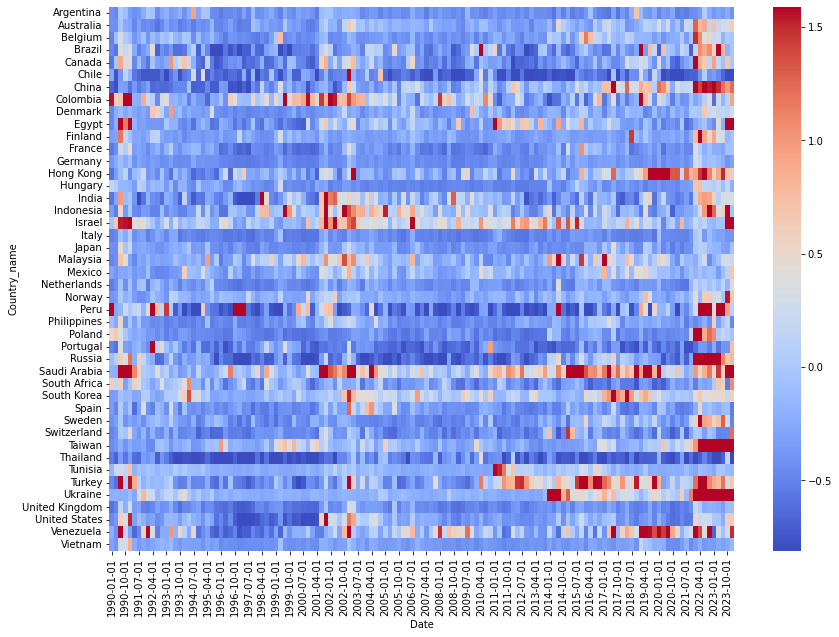

In [13]:
import datetime
# Convert 'Date' to date
# df_gpr['Date'] = df_gpr['Date'].dt.date
df_heatmap = df_gpr.pivot_table(index='Country_name', columns='Date', values='GPRH')

# Selecting data from 1990 to the present
df_heatmap = df_heatmap.loc[:, datetime.date(1990, 1, 1):]

# Flatten the data
data_flat = df_heatmap.values.flatten()

# Calculate the 2st and 98th percentiles
vmin = np.percentile(data_flat, 2)
vmax = np.percentile(data_flat, 98)

plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap='coolwarm', vmin=vmin, vmax=vmax)

plt.show()

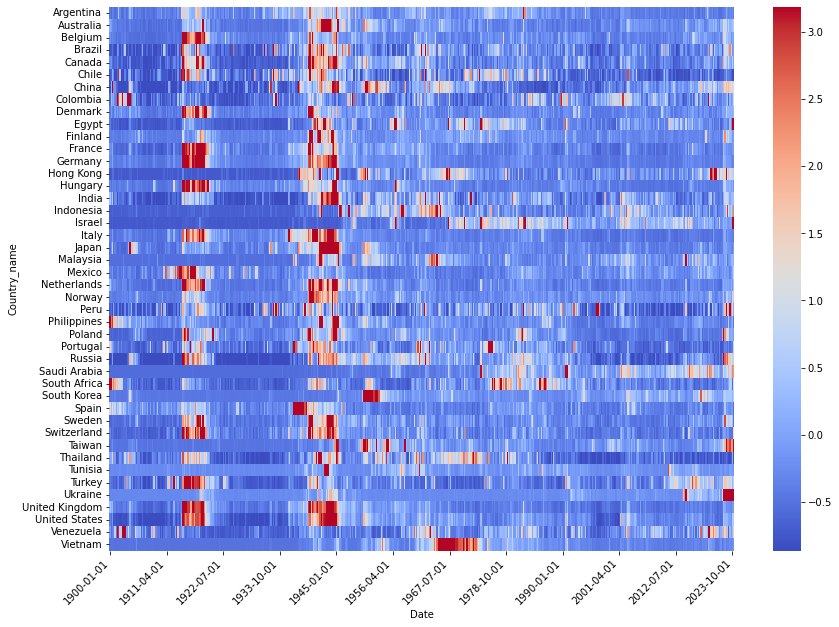

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

# Your existing code
# df_gpr['Date'] = df_gpr['Date'].dt.date
df_heatmap = df_gpr.pivot_table(index='Country_name', columns='Date', values='GPRH')
data_flat = df_heatmap.values.flatten()
vmin = np.percentile(data_flat, 2)
vmax = np.percentile(data_flat, 98)

plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap='coolwarm', vmin=vmin, vmax=vmax)

# New code to modify x-tick labels
ax = plt.gca()
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Get current x-tick locations and labels
locs, labels = plt.xticks()

# Set x-tick locations and labels
new_locs = locs[::5]  # Select every 5th location
new_labels = [labels[i].get_text() for i in range(len(labels)) if i % 5 == 0]  # Select every 5th label

plt.xticks(new_locs, new_labels)

plt.show()

In [32]:
df_heatmap.head(5)

Date,1960-01-01,1960-04-01,1960-07-01,1960-10-01,1961-01-01,1961-04-01,1961-07-01,1961-10-01,1962-01-01,1962-04-01,...,2021-07-01,2021-10-01,2022-01-01,2022-04-01,2022-07-01,2022-10-01,2023-01-01,2023-04-01,2023-07-01,2023-10-01
Country_name,,,,,,,,,,,,,,,,,,,,,
Argentina,-0.097294,0.461158,0.489343,0.142600,-0.449667,0.163223,NaN,0.420234,1.813731,0.235421,...,-0.751464,-0.757754,0.107276,0.304493,0.770089,0.478074,0.075883,0.668249,0.042566,0.061065
Australia,-0.587933,-0.350724,-0.628838,-0.543281,-0.250702,-0.171961,0.279102,0.493092,0.150462,0.217164,...,0.120011,0.110785,2.077993,1.516536,1.798408,0.898370,1.480767,0.822851,0.787001,0.856437
Belgium,-0.706085,-0.560539,1.068431,-0.087586,0.499866,0.110499,0.514703,0.830147,0.046692,-0.174841,...,-0.758816,-0.289801,1.957310,1.415746,0.556424,0.737270,0.362406,0.301648,-0.160762,0.106552
Brazil,-0.780127,-0.478784,-0.025688,0.535776,0.433793,1.073421,1.752354,1.488088,3.755284,0.711773,...,-0.196633,-0.877783,0.995905,1.714311,1.627744,1.672566,1.106362,2.916260,1.190322,0.333350
Canada,-0.350868,0.300593,-0.066967,-0.104036,0.004881,0.958975,0.653998,0.954017,0.199540,0.035538,...,-0.723282,-0.531450,2.544470,1.225712,1.036091,0.526559,1.106431,0.338980,-0.093779,1.216821


## Direction of Trade Statistics (DOTS) from IMF

In [59]:
filename = 'dots_imf.xlsx'
dots_raw = pd.read_excel(filename)

In [74]:
dots_imf = dots_raw.copy()

In [75]:
# Fill out missing values with 0 as per documentation
dots_imf = dots_imf.fillna(0)

In [76]:
dots_imf['Trade'] = dots_imf['Export'] + dots_imf['Import']

dots_imf['tot_trade'] = dots_imf.groupby(['Country_Name', 'Date'])['Trade'].transform('sum')
dots_imf['trade_share'] = dots_imf['Trade'] / dots_imf['tot_trade']
dots_imf['check'] = dots_imf.groupby(['Country_Name', 'Date'])['trade_share'].transform('sum')
dots_imf['Date'] = pd.to_datetime(dots_imf['Date']).dt.to_period('Q').dt.start_time
dots_imf = dots_imf.rename(columns={'Country_Name': 'imf_name'})
dots_imf = dots_imf.rename(columns={'Counterpart_Country_Name': 'imf_name_counterpart'})
dots_imf.head(5)

,imf_name,Country_Code,imf_name_counterpart,Counterpart_Country_Code,Date,Export,Import,Trade,tot_trade,trade_share,check
0,United Kingdom,112,United States,111,1960-01-01,281500000.0,338500000.0,620000000.0,4.063600e+09,0.152574,1.0
1,United Kingdom,112,United States,111,1960-04-01,258600000.0,386600000.0,645200000.0,4.110800e+09,0.156952,1.0
2,United Kingdom,112,United States,111,1960-07-01,197900000.0,399600000.0,597500000.0,3.890000e+09,0.153599,1.0
3,United Kingdom,112,United States,111,1960-10-01,222900000.0,464600000.0,687500000.0,4.199100e+09,0.163726,1.0
4,United Kingdom,112,United States,111,1961-01-01,187200000.0,370800000.0,558000000.0,4.141100e+09,0.134747,1.0


In [77]:
filename = 'imf_name_lookup.xlsx'
imf_lookup = pd.read_excel(filename)
filename = 'imf_name_cp_lookup.xlsx'
imf_lookup_cp = pd.read_excel(filename)
dots_imf = dots_imf.reset_index().merge(imf_lookup, on='imf_name', how='left')
dots_imf = dots_imf.reset_index().merge(imf_lookup_cp, on='imf_name_counterpart', how='left')

In [78]:
dots_imf.head(5)

,level_0,index,imf_name,Country_Code,imf_name_counterpart,Counterpart_Country_Code,Date,Export,Import,Trade,tot_trade,trade_share,check,Country_name_x,Country_name_y
0,0,0,United Kingdom,112,United States,111,1960-01-01,281500000.0,338500000.0,620000000.0,4.063600e+09,0.152574,1.0,United Kingdom,United States
1,1,1,United Kingdom,112,United States,111,1960-04-01,258600000.0,386600000.0,645200000.0,4.110800e+09,0.156952,1.0,United Kingdom,United States
2,2,2,United Kingdom,112,United States,111,1960-07-01,197900000.0,399600000.0,597500000.0,3.890000e+09,0.153599,1.0,United Kingdom,United States
3,3,3,United Kingdom,112,United States,111,1960-10-01,222900000.0,464600000.0,687500000.0,4.199100e+09,0.163726,1.0,United Kingdom,United States
4,4,4,United Kingdom,112,United States,111,1961-01-01,187200000.0,370800000.0,558000000.0,4.141100e+09,0.134747,1.0,United Kingdom,United States


In [64]:
dots_imf = dots_imf.rename(columns={'Country_name_x': 'country'})
dots_imf = dots_imf.rename(columns={'Country_name_y': 'counterpart'})
# print(dots_imf[dots_imf['imf_name'] == 'Belgium-Luxembourg'])

In [65]:
dots_imf = dots_imf[['Date','country', 'counterpart', 'trade_share']]
dots_imf = dots_imf.rename(columns={'country': 'Country_name', 'counterpart': 'Counterpart_name'})
dots_imf.head(5)

,Date,Country_name,Counterpart_name,trade_share
0,1960-01-01,United Kingdom,United States,0.152574
1,1960-04-01,United Kingdom,United States,0.156952
2,1960-07-01,United Kingdom,United States,0.153599
3,1960-10-01,United Kingdom,United States,0.163726
4,1961-01-01,United Kingdom,United States,0.134747


In [66]:
dots_imf.set_index(['Date', 'Country_name'], inplace=True)

In [67]:
dots_imf = dots_imf.sort_values(['Country_name', 'Date'])
dots_imf.head(5)

Counterpart_name  trade_share
Date       Country_name                              
1960-01-01 Argentina       United States     0.200482
           Argentina      United Kingdom     0.172904
           Argentina             Belgium     0.026921
           Argentina             Denmark     0.003064
           Argentina              France     0.048588

In [68]:
filename_imf = 'dots_imf.xlsx'
dots_raw = pd.read_excel(filename_imf)

In [83]:
# Create an instance of the gpr_clean class
dots_cleaner = dataproject.dots_clean(dots_raw)

# Returns the cleaned DataFrame
df_dots = dots_cleaner()

In [84]:
df_dots.head(5)

Counterpart_name  trade_share
Date       Country_name                              
1960-01-01 Argentina       United States     0.200482
           Argentina      United Kingdom     0.172904
           Argentina             Belgium     0.026921
           Argentina             Denmark     0.003064
           Argentina              France     0.048588

In [101]:
trade_cleaner = dataproject.merge_dots_gpr(df_dots, df_gpr)
df_trade = trade_cleaner()

In [102]:
df_trade.head(5)

,Date,name,GPRH_trade_weight
0,1960-01-01,Argentina,-0.097294
1,1960-04-01,Argentina,0.461158
2,1960-07-01,Argentina,0.489343
3,1960-10-01,Argentina,0.142600
4,1961-01-01,Argentina,-0.449667


## Merging GPR and DOTS

In [14]:
# dots_imf = dots_imf.reset_index().rename(columns={'country': 'Country_name'})
merged_df = dots_imf.reset_index().merge(gpr_long, on=['Country_name', 'Date'], how='left')

In [15]:
merged_df = merged_df.rename(columns={'Country_name': 'name', 'Counterpart_name': 'Country_name'})
merged_df.head(5)

,Date,name,Country_name,trade_share,GPRH
0,1960-01-01,Argentina,United States,0.200482,0.193814
1,1960-01-01,Argentina,United Kingdom,0.172904,0.193814
2,1960-01-01,Argentina,Belgium,0.026921,0.193814
3,1960-01-01,Argentina,Denmark,0.003064,0.193814
4,1960-01-01,Argentina,France,0.048588,0.193814


In [16]:
merged_df_2 = merged_df.reset_index().merge(gpr_long, on=['Country_name', 'Date'], how='left')
merged_df_2.head(5)

,index,Date,name,Country_name,trade_share,GPRH_x,GPRH_y
0,0,1960-01-01,Argentina,United States,0.200482,0.193814,-0.325053
1,1,1960-01-01,Argentina,United Kingdom,0.172904,0.193814,-0.205214
2,2,1960-01-01,Argentina,Belgium,0.026921,0.193814,-0.415437
3,3,1960-01-01,Argentina,Denmark,0.003064,0.193814,-0.433675
4,4,1960-01-01,Argentina,France,0.048588,0.193814,0.077589


In [17]:
merged_df_2['product'] = merged_df_2['trade_share'] * merged_df_2['GPRH_y']
merged_df_2['sumproduct'] = merged_df_2.groupby(['Date', 'name'])['product'].transform('sum')

In [18]:
merged_df_2['GPRH_trade_weight'] = merged_df_2['sumproduct'] + merged_df_2['GPRH_x']
merged_df_2.head(5)

,index,Date,name,Country_name,trade_share,GPRH_x,GPRH_y,product,sumproduct,GPRH_trade_weight
0,0,1960-01-01,Argentina,United States,0.200482,0.193814,-0.325053,-0.065167,-0.291108,-0.097294
1,1,1960-01-01,Argentina,United Kingdom,0.172904,0.193814,-0.205214,-0.035482,-0.291108,-0.097294
2,2,1960-01-01,Argentina,Belgium,0.026921,0.193814,-0.415437,-0.011184,-0.291108,-0.097294
3,3,1960-01-01,Argentina,Denmark,0.003064,0.193814,-0.433675,-0.001329,-0.291108,-0.097294
4,4,1960-01-01,Argentina,France,0.048588,0.193814,0.077589,0.003770,-0.291108,-0.097294


In [19]:
merged_df_2_no_dub = merged_df_2.drop_duplicates(subset=['Date', 'name', 'GPRH_trade_weight'])
merged_df_2_no_dub.head(5)

,index,Date,name,Country_name,trade_share,GPRH_x,GPRH_y,product,sumproduct,GPRH_trade_weight
0,0,1960-01-01,Argentina,United States,0.200482,0.193814,-0.325053,-0.065167,-0.291108,-0.097294
33,33,1960-04-01,Argentina,United States,0.183906,0.568831,-0.107283,-0.019730,-0.107673,0.461158
66,66,1960-07-01,Argentina,United States,0.181598,0.491626,-0.209149,-0.037981,-0.002283,0.489343
98,98,1960-10-01,Argentina,United States,0.203185,0.276994,-0.176344,-0.035830,-0.134393,0.142600
132,132,1961-01-01,Argentina,United States,0.193917,-0.266736,-0.207954,-0.040326,-0.182932,-0.449667


In [20]:
gpr_trade = merged_df_2_no_dub[['Date','name', 'GPRH_trade_weight']]
gpr_trade.set_index(['Date', 'name'], inplace=True)
gpr_trade.head(5)

,,GPRH_trade_weight
Date,name,
1960-01-01,Argentina,-0.097294
1960-04-01,Argentina,0.461158
1960-07-01,Argentina,0.489343
1960-10-01,Argentina,0.142600
1961-01-01,Argentina,-0.449667


In [21]:
gpr_trade.reset_index(inplace=True)
gpr_trade.head(5)

,Date,name,GPRH_trade_weight
0,1960-01-01,Argentina,-0.097294
1,1960-04-01,Argentina,0.461158
2,1960-07-01,Argentina,0.489343
3,1960-10-01,Argentina,0.142600
4,1961-01-01,Argentina,-0.449667


# Ideal Point Estimates 

In [13]:
filename = 'IdealpointestimatesAll_Sep2023.csv'
df = pd.read_csv(filename, delimiter=';')

# Create an instance of the idealpoint_clean class
cleaner = dataproject.idealpoint_clean(df)

# Returns the cleaned DataFrame
df_idealpoint = cleaner()

In [14]:
df_idealpoint.head(5)

,,IdealPointAll
Date,Country_name,
1946-01-01,Afghanistan,1.191005
1946-04-01,Afghanistan,1.191005
1946-07-01,Afghanistan,1.191005
1946-10-01,Afghanistan,1.191005
1947-01-01,Afghanistan,0.239827


In [39]:
merger = dataproject.merge_data(df_gpr, df_idealpoint)
df_gpr_idealpoint = merger()

In [41]:
df_gpr_idealpoint.head(10)

,,GPRH,IdealPointAll
Date,Country_name,,
1946-01-01,Argentina,0.429051,1.860128
1946-04-01,Argentina,0.514888,1.860128
1946-07-01,Argentina,0.505425,1.860128
1946-10-01,Argentina,0.539356,1.860128
1947-01-01,Argentina,0.272223,2.214596
1947-04-01,Argentina,0.157388,2.214596
1947-07-01,Argentina,1.359836,2.214596
1947-10-01,Argentina,0.060924,2.214596
1948-01-01,Argentina,-0.065262,0.676745


In [26]:
filename = 'IdealpointestimatesAll_Sep2023.csv'
df = pd.read_csv(filename, delimiter=';')

pivot_df = df.pivot_table(index='session', columns='Countryname', values='IdealPointAll')
pivot_df.columns.name = None

In [27]:
pivot_df['ideal_left'] = pivot_df[pivot_df < 0].mean(axis=1)
pivot_df['ideal_right'] = pivot_df[pivot_df > 0].mean(axis=1)
pivot_df.index = pd.date_range(start='01-01-1946', periods=len(pivot_df), freq='AS')
long_df = pivot_df.reset_index()
long_df = pivot_df.reset_index().melt(id_vars='index', var_name='Countryname', value_name='IdealPointAll')
long_df.head(5)

,index,Countryname,IdealPointAll
0,1946-01-01,Afghanistan,1.191005
1,1947-01-01,Afghanistan,0.239827
2,1948-01-01,Afghanistan,-0.064428
3,1949-01-01,Afghanistan,-0.419353
4,1950-01-01,Afghanistan,-0.605796


In [28]:
long_df = long_df.rename(columns={'Countryname': 'Country_name', 'index': 'Date'})
long_df.head(5)

,Date,Country_name,IdealPointAll
0,1946-01-01,Afghanistan,1.191005
1,1947-01-01,Afghanistan,0.239827
2,1948-01-01,Afghanistan,-0.064428
3,1949-01-01,Afghanistan,-0.419353
4,1950-01-01,Afghanistan,-0.605796


In [29]:
# Set 'session' and 'Countryname' as multi-index in both dataframes
long_df.set_index('Date', inplace=True)
# gpr_long.set_index('Date', inplace=True)

In [30]:
long_df_q = long_df.groupby('Country_name').resample('Q').ffill()

In [31]:
long_df_q.drop(columns='Country_name', inplace=True)
long_df_q.head(5)

IdealPointAll
Country_name Date                     
Afghanistan  1946-03-31       1.191005
             1946-06-30       1.191005
             1946-09-30       1.191005
             1946-12-31       1.191005
             1947-03-31       0.239827

In [32]:
# Convert 'Date' to Period with quarterly frequency, then convert back to timestamps at the start of the quarter
long_df_q.reset_index(inplace=True)
long_df_q['Date'] = long_df_q['Date'].dt.to_period('Q').dt.to_timestamp()

# Set 'Date' and 'Country_name' back as the index
long_df_q.set_index(['Date', 'Country_name'], inplace=True)

In [36]:
merged_df = df_gpr.reset_index().merge(long_df_q, on=['Country_name', 'Date'], how='left')
merged_df = merged_df[merged_df['Date'].dt.year >= 1946]
merged_df.drop(columns='index', inplace=True)
merged_df.head(5)

,Date,Country_name,GPRH,IdealPointAll
184,1946-01-01,Argentina,0.429051,1.860128
185,1946-04-01,Argentina,0.514888,1.860128
186,1946-07-01,Argentina,0.505425,1.860128
187,1946-10-01,Argentina,0.539356,1.860128
188,1947-01-01,Argentina,0.272223,2.214596


In [37]:
# drop NaA values
merged_df.dropna(inplace=True)
merged_df.set_index(['Date', 'Country_name'], inplace=True)
merged_df.head(5)

,,GPRH,IdealPointAll
Date,Country_name,,
1946-01-01,Argentina,0.429051,1.860128
1946-04-01,Argentina,0.514888,1.860128
1946-07-01,Argentina,0.505425,1.860128
1946-10-01,Argentina,0.539356,1.860128
1947-01-01,Argentina,0.272223,2.214596


In [81]:
# Calculate the average of 'IdealPointAll' by 'Country_name'
average_ideal_point = merged_df.groupby(level='Country_name')['IdealPointAll'].mean()

# Create a new column that assigns 1 if the average of 'IdealPointAll' is positive and 0 otherwise
merged_df['NewColumn'] = merged_df.index.get_level_values('Country_name').map(lambda x: 1 if average_ideal_point[x] > 0 else 0)

In [83]:
average_ideal_point = merged_df.groupby([merged_df.index.get_level_values('Date'), 'NewColumn'])['GPRH'].mean()
average_ideal_point.head(5)

Date        NewColumn
1946-01-01  0            0.290006
            1            0.254046
1946-04-01  0            0.306110
            1            0.208162
1946-07-01  0            0.330395
Name: GPRH, dtype: float64

In [82]:
merged_df.head(50)

,,GPRH,IdealPointAll,NewColumn
Date,Country_name,,,
1946-01-01,Argentina,0.429051,1.860128,1
1946-04-01,Argentina,0.514888,1.860128,1
1946-07-01,Argentina,0.505425,1.860128,1
1946-10-01,Argentina,0.539356,1.860128,1
1947-01-01,Argentina,0.272223,2.214596,1
1947-04-01,Argentina,0.157388,2.214596,1
1947-07-01,Argentina,1.359836,2.214596,1
1947-10-01,Argentina,0.060924,2.214596,1
1948-01-01,Argentina,-0.065262,0.676745,1


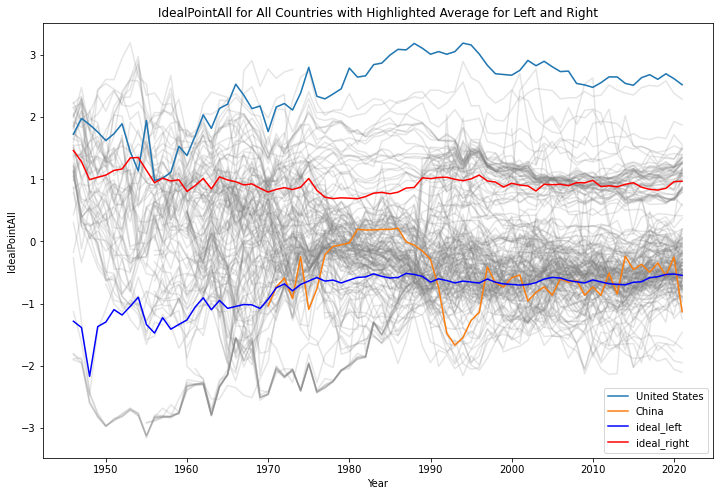

In [123]:
# Plot the underlying 'IdealPointAll' lines in grey
plt.figure(figsize=(12,8))
for column in pivot_df.columns:
    if column not in ['ideal_left', 'ideal_right']:
        plt.plot(pivot_df.index, pivot_df[column], color='grey', alpha=0.2)

# Plot the 'ideal_left' and 'ideal_right' lines in different colors
plt.plot(pivot_df.index, pivot_df['United States'], label='United States')
plt.plot(pivot_df.index, pivot_df['China'], label='China')
plt.plot(pivot_df.index, pivot_df['ideal_left'], color='blue', label='ideal_left')
plt.plot(pivot_df.index, pivot_df['ideal_right'], color='red', label='ideal_right')

plt.xlabel('Year')
plt.ylabel('IdealPointAll')
plt.title('IdealPointAll for All Countries with Highlighted Average for Left and Right')
plt.legend()
plt.show()

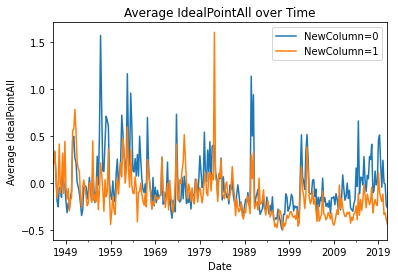

In [85]:
# Create separate line plots for each value of 'NewColumn'
for new_column_value in average_ideal_point.index.get_level_values('NewColumn').unique():
    subset = average_ideal_point.xs(new_column_value, level='NewColumn')
    subset.plot(kind='line', label=f'NewColumn={new_column_value}')

plt.title('Average IdealPointAll over Time')
plt.xlabel('Date')
plt.ylabel('Average IdealPointAll')
plt.legend()
plt.show()

You can maybe show the all the GPRH trade weigthed indices as a heatmap with time in the x-axis and the countries in the y-axis.

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

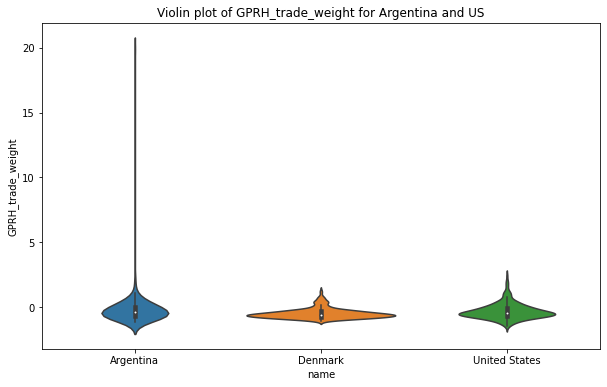

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Argentina and US
gpr_trade_filtered = gpr_trade[gpr_trade['name'].isin(['Argentina', 'United States', 'Denmark'])]

# Create violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='name', y='GPRH_trade_weight', data=gpr_trade_filtered)
plt.title('Violin plot of GPRH_trade_weight for Argentina and US')
plt.show()

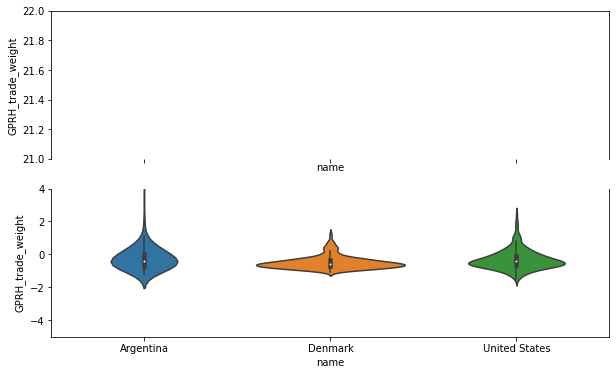

In [58]:
# Filter data for Argentina, US, and Denmark
gpr_trade_filtered = gpr_trade[gpr_trade['name'].isin(['Argentina', 'United States', 'Denmark'])]

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))

# Set the y-axis limits for the top and bottom plots
ax1.set_ylim(21, 22)  # top plot
ax2.set_ylim(-5, 4)  # bottom plot

# Hide the spines between the two plots
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Create the violin plots
sns.violinplot(x='name', y='GPRH_trade_weight', data=gpr_trade_filtered, ax=ax1)
sns.violinplot(x='name', y='GPRH_trade_weight', data=gpr_trade_filtered, ax=ax2)

# Add a title
# plt.title('Violin plot of GPRH_trade_weight for Argentina, US, and Denmark')

# Show the plot
plt.show()

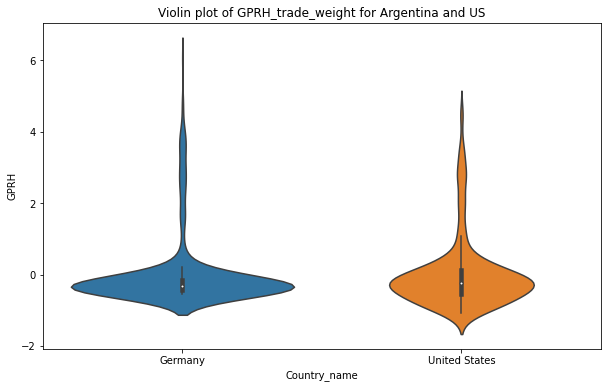

In [61]:
# Filter data for Argentina and US
gpr_long_filtered = gpr_long[gpr_long['Country_name'].isin(['Germany', 'United States'])]

# Create violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Country_name', y='GPRH', data=gpr_long_filtered)
plt.title('Violin plot of GPRH_trade_weight for Argentina and US')
plt.show()

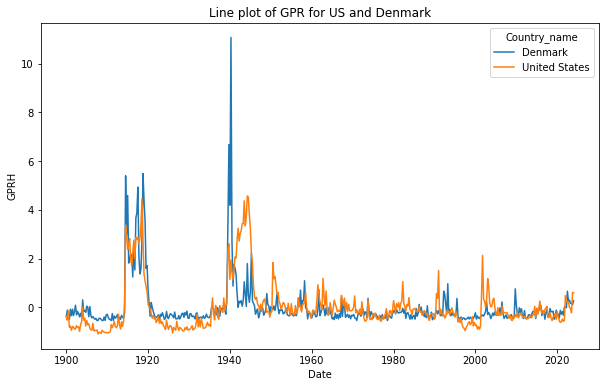

In [66]:
# Filter data for US and Denmark
gpr_long_filtered = gpr_long[gpr_long['Country_name'].isin(['United States', 'Denmark'])]

# Create line plot
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='GPRH', hue='Country_name', data=gpr_long_filtered)
plt.title('Line plot of GPR for US and Denmark')
plt.show()

**Interactive plot** :

In [2]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

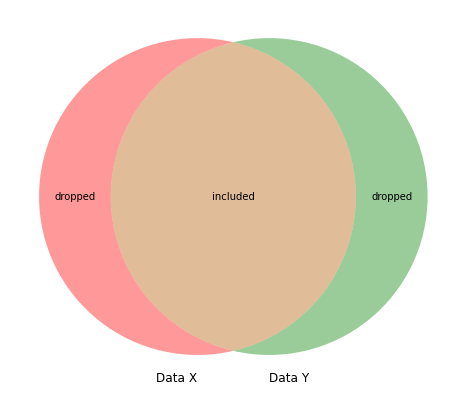

In [3]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.